In [5]:
import pandas as pd 


In [13]:
names = ["edible","cap-shape","cap-surface", "cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stock-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","viel-type","viel-color","ring number","ring-type","spore-print-color","population","habitat"]
dataset = pd.read_csv('mush.csv',names = names)

In [14]:
dataset.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stock-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,viel-type,viel-color,ring number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
dataset.shape

(8124, 22)

In [20]:
dataset[dataset.edible =='p'].head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stock-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,viel-type,viel-color,ring number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g


In [94]:
from ctypes import PyDLL
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix 

enc = OrdinalEncoder()
X = dataset.drop('edible', axis=1) #corresponding attributes 
y = dataset['edible'] #corresponding label (trying to predict)
#print(x.head)
#print(y.head)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(x)
#print(encodedx)
encodedy = enc.fit_transform(y)
#print(encodedy[0:15])


[[1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [34]:
from sklearn.model_selection import train_test_split


In [73]:
X_train, X_test, y_train, y_test = train_test_split(encodedx, encodedy, test_size=0.2,random_state=1)

In [74]:
len(X_train)

6499

In [75]:
len(X_test)

1625

In [101]:
#creating KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [102]:
knn.score(X_test, y_test)

0.9987692307692307

In [103]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[820,   0],
       [  2, 803]], dtype=int64)

Text(42.0, 0.5, 'Truth')

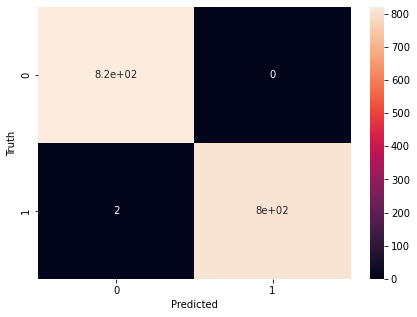

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
#Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       820
         1.0       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0, 0.5, 'Testing Accuracy')

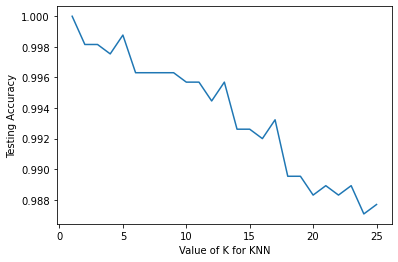

In [119]:
#Accuracy Rate Overtime as K values changes

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [120]:
#Can Give Random Values to predict random obersvations

classes = {1:"poisonous",0:"Edible"}

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.ravel())

x_new = [encodedx[0],encodedx[2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

poisonous
Edible


[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.78325123 1.        ]
sv_scores.mean:0.9468368082695605
--- 1.969438076019287 seconds ---


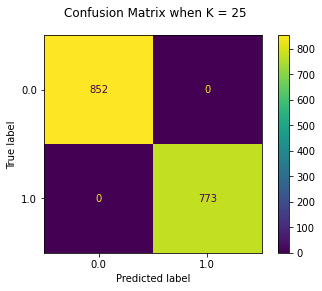

 
Confusion Matrix:


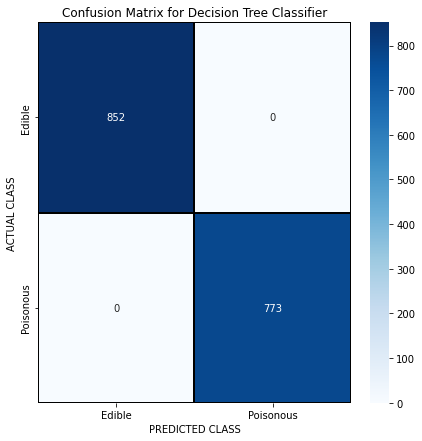

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       852
         1.0       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [8]:
#task is to predict if it is poisonous or not based on it attributes given 

#import all the dependencies
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix

#import the dataset
mushroomdata = pd.read_csv('mushs.csv', header=0)
#data preprocessing
enc = OrdinalEncoder()
x = mushroomdata.drop('edible', axis=1) #corresponding attributes 
y = mushroomdata['edible'] #corresponding label (trying to predict)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(x)
encodedy = enc.fit_transform(y)



#training and testing division 
x_train, x_test, y_train, y_test = train_test_split(encodedx, encodedy, test_size=0.20)
y_train = np.ravel(y_train)

#SCALING--------------------------------------------------------------------------------------------------------
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)




##SVM ----------------------------------------------------------------------------------------------------------
#support vector classifier class for classification 
#gamma
#c = cost 
svclassifier = SVC(kernel='poly', C=0.1, gamma=1)
svclassifier.fit(x_train, y_train)

#predict classes
y_pred = svclassifier.predict(x_test)

#evaluation of one training set --------------------------------------------------------------------------------
#evaluation of the model
    #print(classification_report(y_test, y_pred))


#from sklearn.model_selection import GridSearchCV
 
# defining parameter range
#param_grid = {'C': [0.1, 1, 10],
     #         'gamma': [1, 0.1, 0.01],
      #        'kernel': ['poly']}
 
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 10)
 
# fitting the model for grid search
#grid.fit(x_train, y_train) 
# print best parameter after tuning
#print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)


from sklearn.metrics import confusion_matrix
import time
start_time = time.time()

import seaborn as sns
#cross validation score ----------------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
encodedy = np.ravel(encodedy)
cv_scores = cross_val_score(svclassifier, encodedx, encodedy, cv =10)
print(cv_scores)
print('sv_scores.mean:{}'.format(np.mean(cv_scores)))

svclassifier = SVC(kernel='poly', C=0.1, gamma=1)
svclassifier.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(svclassifier, x_test, y_test)
fig.figure_.suptitle("Confusion Matrix when K = 25")
plt.show()
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(" ")
#print("Confusion Matrix (criterion='gini', max_depth=15, min_samples_split=8, splitter='random'):")
print("Confusion Matrix:")
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.savefig("dtcm2.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred))

In [12]:
from sklearn.metrics import accuracy_score
y_pred = mlp_clf.predict(testX_scaled)


print("--- %s seconds ---" % (time.time() - start_time))


print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

NameError: name 'mlp_clf' is not defined